## Arewa DataScience Academy
## Arewa DataScience Academy
### Deep Learning Cohort 2.0

### WEEK 5 Solution

#### Pytorch Custom Datasets Solution


### 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. __Increase MOdel Complexity__: Use a complex model (e.g, adding more layers in a neural network or using a non-linear algorithm like Ramdom Forest instead of Linear Regression) to better capture patterns in the data.
2. __Feature Engineering__: improve the quality of input data by selecting relevant features, creating new ones, or transforming existing ones to provide better insights for the model.
3. __Reduce Regularization__: Decrease the strength of regularization (e.g lowering L1/L2 panelties) to allow the model to fit the traning data more closely without overly restricting its flexibilityl

### 2. Recreate the data loading functions we built in sections 1, 2, 3 and 4. You should have train and test DataLoader's ready to use.

In [2]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else: 
  print(f"Did not find {image_path} directory, creating...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data (images from GitHub)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, suhsi data to {image_path}")
  zip_ref.extractall(image_path) 

data/pizza_steak_sushi directory exists.
Unzipping pizza, steak, suhsi data to data/pizza_steak_sushi


In [3]:

# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [4]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

[PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg'), PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'), PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg')]
data/pizza_steak_sushi/train/pizza/320570.jpg
pizza
Random image path: data/pizza_steak_sushi/train/pizza/320570.jpg
Image class: pizza
Image height: 512
Image width: 382


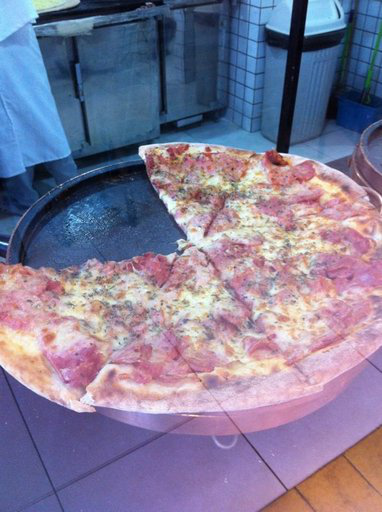

In [5]:

# Visualize an image
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:3])

# 2. Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img
# Image.open("/content/data/pizza_steak_sushi/test/pizza/194643.jpg")

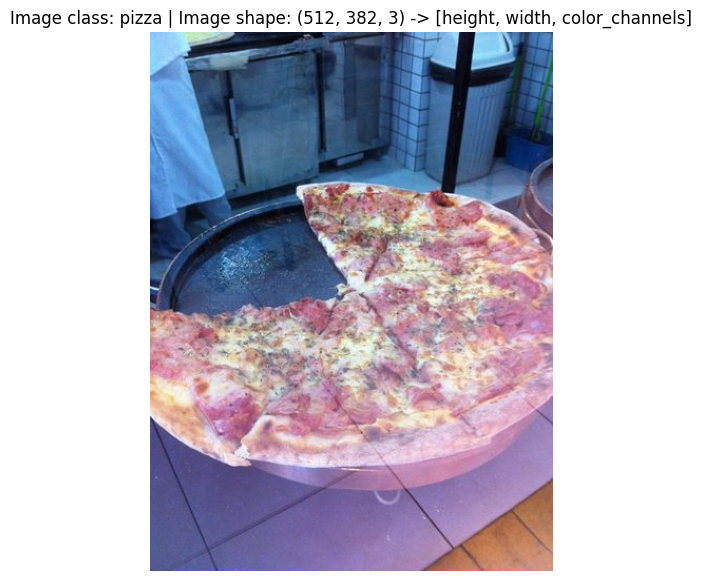

In [6]:

# Do the image visualization with matplotlib
import numpy as np 
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [7]:

# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
     

# Write transform for turning images into tensors
data_transform = transforms.Compose([
  # Resize the images to 64x64x3 (64 height, 64 width, 3 color channels)
  transforms.Resize(size=(64, 64)),
  # Flip the images randomly on horizontal
  transforms.RandomHorizontalFlip(p=0.5),
  # Turn the image into a torch.Tensor
  transforms.ToTensor() # converts all pixel values from 0-255 to be between 0-1
])


random.sample(image_path_list, k=3)

[PosixPath('data/pizza_steak_sushi/train/sushi/855721.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1621763.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/309892.jpg')]

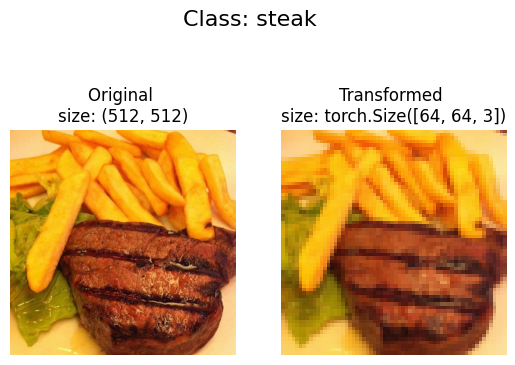

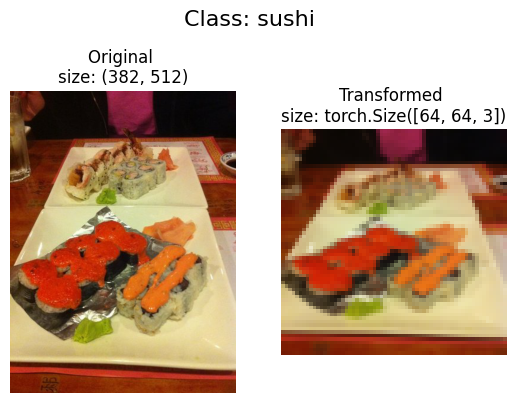

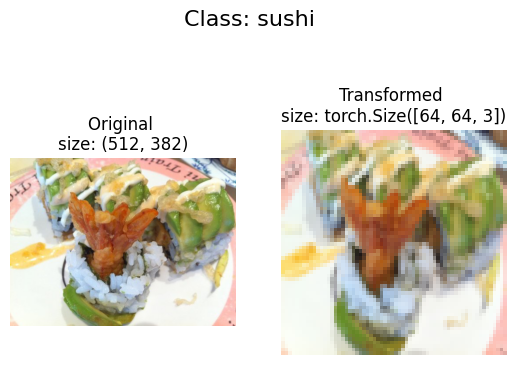

In [8]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """Plots a series of random images from image_paths.""" 
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nsize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      # permute() the image to make sure it's compatible with matplotlib
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nsize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [9]:

# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images 
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data
     

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [10]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [11]:

# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [12]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [13]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x72c03f8131d0>,
 <torch.utils.data.dataloader.DataLoader at 0x72c03fb4be30>)

In [14]:

# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)
     

(225, 75)

In [15]:

img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


### 3, Recreate model_0 we built in section 7


In [16]:
import torch
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape))
        
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Layer 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Layer 2 shape: {x.shape}")
    x = self.classifier(x)
    # print(f"Layer 3 shape: {x.shape}")
    return x

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [19]:
model_0 = TinyVGG(input_shape = 3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [20]:
len(class_names)


# Pass dummy data through model
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))

tensor([[-0.0017,  0.0408,  0.0038]], grad_fn=<AddmmBackward0>)

### 4. Create training and testing functions for model_0

In [21]:


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device) 

    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc 

In [22]:

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [23]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

/home/naziruai/miniconda3/envs/deep_learning/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?

Use torch.optim.Adam() with a learning rate of 0.001 as the optimizer.


In [24]:
# train for 5 epochs
# Set random seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Initialize the model and move it to the appropriate device
model_0 = TinyVGG(
    input_shape=3, 
    hidden_units=10, 
    output_shape=len(class_names)
).to(device)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

# Train the model for 5 epochs
model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    epochs=5
)


 20%|██        | 1/5 [00:03<00:14,  3.62s/it]

Epoch: 1 | train_loss: 1.1178 | train_acc: 0.2800 | test_loss: 1.0965 | test_acc: 0.3067


 40%|████      | 2/5 [00:07<00:10,  3.61s/it]

Epoch: 2 | train_loss: 1.1001 | train_acc: 0.2978 | test_loss: 1.0994 | test_acc: 0.2533


 60%|██████    | 3/5 [00:11<00:07,  3.86s/it]

Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.3333


 80%|████████  | 4/5 [00:14<00:03,  3.73s/it]

Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3289 | test_loss: 1.0999 | test_acc: 0.3333


100%|██████████| 5/5 [00:18<00:00,  3.77s/it]

Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3200 | test_loss: 1.0999 | test_acc: 0.3333


In [25]:
# train for 20 epochs
# Set random seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Initialize the model and move it to the appropriate device
model_0 = TinyVGG(
    input_shape=3, 
    hidden_units=10, 
    output_shape=len(class_names)
).to(device)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

# Train the model for 5 epochs
model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    epochs=20
)


  5%|▌         | 1/20 [00:03<01:05,  3.47s/it]

Epoch: 1 | train_loss: 1.1178 | train_acc: 0.2800 | test_loss: 1.0965 | test_acc: 0.3067


 10%|█         | 2/20 [00:07<01:04,  3.59s/it]

Epoch: 2 | train_loss: 1.1001 | train_acc: 0.2978 | test_loss: 1.0994 | test_acc: 0.2533


 15%|█▌        | 3/20 [00:10<01:01,  3.59s/it]

Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.3333


 20%|██        | 4/20 [00:14<00:57,  3.57s/it]

Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3289 | test_loss: 1.0999 | test_acc: 0.3333


 25%|██▌       | 5/20 [00:17<00:51,  3.46s/it]

Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3200 | test_loss: 1.0999 | test_acc: 0.3333


 30%|███       | 6/20 [00:21<00:48,  3.49s/it]

Epoch: 6 | train_loss: 1.1047 | train_acc: 0.3467 | test_loss: 1.1006 | test_acc: 0.3333


 35%|███▌      | 7/20 [00:24<00:46,  3.58s/it]

Epoch: 7 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1006 | test_acc: 0.3333


 40%|████      | 8/20 [00:28<00:42,  3.54s/it]

Epoch: 8 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1013 | test_acc: 0.3333


 45%|████▌     | 9/20 [00:31<00:37,  3.44s/it]

Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1013 | test_acc: 0.3333


 50%|█████     | 10/20 [00:35<00:35,  3.56s/it]

Epoch: 10 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333


 55%|█████▌    | 11/20 [00:38<00:31,  3.46s/it]

Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333


 60%|██████    | 12/20 [00:42<00:29,  3.63s/it]

Epoch: 12 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1012 | test_acc: 0.3333


 65%|██████▌   | 13/20 [00:45<00:24,  3.53s/it]

Epoch: 13 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333


 70%|███████   | 14/20 [00:50<00:23,  3.90s/it]

Epoch: 14 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333


 75%|███████▌  | 15/20 [00:53<00:18,  3.73s/it]

Epoch: 15 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333


 80%|████████  | 16/20 [00:57<00:14,  3.61s/it]

Epoch: 16 | train_loss: 1.0987 | train_acc: 0.3422 | test_loss: 1.1013 | test_acc: 0.3333


 85%|████████▌ | 17/20 [01:00<00:10,  3.58s/it]

Epoch: 17 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1023 | test_acc: 0.3333


 90%|█████████ | 18/20 [01:04<00:07,  3.51s/it]

Epoch: 18 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333


 95%|█████████▌| 19/20 [01:07<00:03,  3.51s/it]

Epoch: 19 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333


100%|██████████| 20/20 [01:11<00:00,  3.56s/it]

Epoch: 20 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333


In [26]:
# train for 50 epochs
# Set random seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Initialize the model and move it to the appropriate device
model_0 = TinyVGG(
    input_shape=3, 
    hidden_units=10, 
    output_shape=len(class_names)
).to(device)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

# Train the model for 5 epochs
model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    epochs=50
)


  2%|▏         | 1/50 [00:03<02:51,  3.51s/it]

Epoch: 1 | train_loss: 1.1178 | train_acc: 0.2800 | test_loss: 1.0965 | test_acc: 0.3067


  4%|▍         | 2/50 [00:06<02:38,  3.30s/it]

Epoch: 2 | train_loss: 1.1001 | train_acc: 0.2978 | test_loss: 1.0994 | test_acc: 0.2533


  6%|▌         | 3/50 [00:09<02:33,  3.28s/it]

Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.3333


  8%|▊         | 4/50 [00:13<02:31,  3.30s/it]

Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3289 | test_loss: 1.0999 | test_acc: 0.3333


 10%|█         | 5/50 [00:16<02:27,  3.28s/it]

Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3200 | test_loss: 1.0999 | test_acc: 0.3333


 12%|█▏        | 6/50 [00:19<02:25,  3.31s/it]

Epoch: 6 | train_loss: 1.1047 | train_acc: 0.3467 | test_loss: 1.1006 | test_acc: 0.3333


 14%|█▍        | 7/50 [00:23<02:20,  3.26s/it]

Epoch: 7 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1006 | test_acc: 0.3333


 16%|█▌        | 8/50 [00:26<02:22,  3.40s/it]

Epoch: 8 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1013 | test_acc: 0.3333


 18%|█▊        | 9/50 [00:30<02:18,  3.38s/it]

Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1013 | test_acc: 0.3333


 20%|██        | 10/50 [00:33<02:12,  3.32s/it]

Epoch: 10 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333


 22%|██▏       | 11/50 [00:37<02:20,  3.59s/it]

Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333


 24%|██▍       | 12/50 [00:41<02:24,  3.82s/it]

Epoch: 12 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1012 | test_acc: 0.3333


 26%|██▌       | 13/50 [00:45<02:19,  3.77s/it]

Epoch: 13 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333


 28%|██▊       | 14/50 [00:48<02:10,  3.63s/it]

Epoch: 14 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333


 30%|███       | 15/50 [00:52<02:04,  3.56s/it]

Epoch: 15 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333


 32%|███▏      | 16/50 [00:55<01:59,  3.51s/it]

Epoch: 16 | train_loss: 1.0987 | train_acc: 0.3422 | test_loss: 1.1013 | test_acc: 0.3333


 34%|███▍      | 17/50 [00:58<01:52,  3.42s/it]

Epoch: 17 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1023 | test_acc: 0.3333


 36%|███▌      | 18/50 [01:02<01:48,  3.40s/it]

Epoch: 18 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333


 38%|███▊      | 19/50 [01:05<01:43,  3.35s/it]

Epoch: 19 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333


 40%|████      | 20/50 [01:08<01:40,  3.34s/it]

Epoch: 20 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333


 42%|████▏     | 21/50 [01:12<01:37,  3.35s/it]

Epoch: 21 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1023 | test_acc: 0.3333


 44%|████▍     | 22/50 [01:15<01:32,  3.32s/it]

Epoch: 22 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1019 | test_acc: 0.3333


 46%|████▌     | 23/50 [01:18<01:29,  3.31s/it]

Epoch: 23 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1025 | test_acc: 0.3333


 48%|████▊     | 24/50 [01:21<01:25,  3.29s/it]

Epoch: 24 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333


 50%|█████     | 25/50 [01:25<01:21,  3.27s/it]

Epoch: 25 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1027 | test_acc: 0.3333


 52%|█████▏    | 26/50 [01:28<01:19,  3.30s/it]

Epoch: 26 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1025 | test_acc: 0.3333


 54%|█████▍    | 27/50 [01:31<01:15,  3.30s/it]

Epoch: 27 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333


 56%|█████▌    | 28/50 [01:35<01:12,  3.30s/it]

Epoch: 28 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333


 58%|█████▊    | 29/50 [01:38<01:09,  3.32s/it]

Epoch: 29 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333


 60%|██████    | 30/50 [01:41<01:05,  3.29s/it]

Epoch: 30 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1025 | test_acc: 0.3333


 62%|██████▏   | 31/50 [01:44<01:02,  3.31s/it]

Epoch: 31 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333


 64%|██████▍   | 32/50 [01:48<00:59,  3.33s/it]

Epoch: 32 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333


 66%|██████▌   | 33/50 [01:51<00:56,  3.29s/it]

Epoch: 33 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1023 | test_acc: 0.3333


 68%|██████▊   | 34/50 [01:54<00:52,  3.31s/it]

Epoch: 34 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1025 | test_acc: 0.3333


 70%|███████   | 35/50 [01:58<00:51,  3.44s/it]

Epoch: 35 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333


 72%|███████▏  | 36/50 [02:02<00:48,  3.47s/it]

Epoch: 36 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1023 | test_acc: 0.3333


 74%|███████▍  | 37/50 [02:05<00:43,  3.35s/it]

Epoch: 37 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1026 | test_acc: 0.3333


 76%|███████▌  | 38/50 [02:08<00:40,  3.40s/it]

Epoch: 38 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1026 | test_acc: 0.3333


 78%|███████▊  | 39/50 [02:11<00:36,  3.33s/it]

Epoch: 39 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333


 80%|████████  | 40/50 [02:15<00:35,  3.53s/it]

Epoch: 40 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1027 | test_acc: 0.3333


 82%|████████▏ | 41/50 [02:19<00:31,  3.54s/it]

Epoch: 41 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1026 | test_acc: 0.3333


 84%|████████▍ | 42/50 [02:22<00:28,  3.51s/it]

Epoch: 42 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333


 86%|████████▌ | 43/50 [02:26<00:24,  3.56s/it]

Epoch: 43 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333


 88%|████████▊ | 44/50 [02:30<00:21,  3.59s/it]

Epoch: 44 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1029 | test_acc: 0.3333


 90%|█████████ | 45/50 [02:33<00:17,  3.50s/it]

Epoch: 45 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1023 | test_acc: 0.3333


 92%|█████████▏| 46/50 [02:36<00:13,  3.43s/it]

Epoch: 46 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1027 | test_acc: 0.3333


 94%|█████████▍| 47/50 [02:40<00:10,  3.52s/it]

Epoch: 47 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1024 | test_acc: 0.3333


 96%|█████████▌| 48/50 [02:44<00:07,  3.52s/it]

Epoch: 48 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1024 | test_acc: 0.3333


 98%|█████████▊| 49/50 [02:47<00:03,  3.41s/it]

Epoch: 49 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333


100%|██████████| 50/50 [02:50<00:00,  3.42s/it]

Epoch: 50 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.3333


### 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [27]:
# Set random seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Initialize the model and move it to the appropriate device
model_0 = TinyVGG(
    input_shape=3, 
    hidden_units=20, 
    output_shape=len(class_names)
).to(device)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

# Train the model for 5 epochs
model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    epochs=20
)


  5%|▌         | 1/20 [00:04<01:29,  4.72s/it]

Epoch: 1 | train_loss: 1.0967 | train_acc: 0.3378 | test_loss: 1.0812 | test_acc: 0.3733


 10%|█         | 2/20 [00:08<01:18,  4.36s/it]

Epoch: 2 | train_loss: 1.0159 | train_acc: 0.5200 | test_loss: 1.0380 | test_acc: 0.4533


 15%|█▌        | 3/20 [00:13<01:14,  4.38s/it]

Epoch: 3 | train_loss: 0.9590 | train_acc: 0.5778 | test_loss: 1.0158 | test_acc: 0.4800


 20%|██        | 4/20 [00:17<01:07,  4.24s/it]

Epoch: 4 | train_loss: 0.8954 | train_acc: 0.5556 | test_loss: 0.9868 | test_acc: 0.5067


 25%|██▌       | 5/20 [00:21<01:03,  4.22s/it]

Epoch: 5 | train_loss: 0.8836 | train_acc: 0.6000 | test_loss: 0.9987 | test_acc: 0.4533


 30%|███       | 6/20 [00:25<00:57,  4.14s/it]

Epoch: 6 | train_loss: 0.8260 | train_acc: 0.6356 | test_loss: 0.9708 | test_acc: 0.4533


 35%|███▌      | 7/20 [00:29<00:53,  4.14s/it]

Epoch: 7 | train_loss: 0.8034 | train_acc: 0.6578 | test_loss: 1.1452 | test_acc: 0.4667


 40%|████      | 8/20 [00:33<00:50,  4.17s/it]

Epoch: 8 | train_loss: 0.7418 | train_acc: 0.7022 | test_loss: 1.0646 | test_acc: 0.4400


 45%|████▌     | 9/20 [00:38<00:46,  4.19s/it]

Epoch: 9 | train_loss: 0.7185 | train_acc: 0.6889 | test_loss: 1.0469 | test_acc: 0.4267


 50%|█████     | 10/20 [00:42<00:41,  4.18s/it]

Epoch: 10 | train_loss: 0.6992 | train_acc: 0.6711 | test_loss: 1.0982 | test_acc: 0.4533


 55%|█████▌    | 11/20 [00:46<00:39,  4.34s/it]

Epoch: 11 | train_loss: 0.6630 | train_acc: 0.6889 | test_loss: 1.0861 | test_acc: 0.4800


 60%|██████    | 12/20 [00:51<00:34,  4.27s/it]

Epoch: 12 | train_loss: 0.6521 | train_acc: 0.7333 | test_loss: 1.1356 | test_acc: 0.4400


 65%|██████▌   | 13/20 [00:55<00:29,  4.26s/it]

Epoch: 13 | train_loss: 0.6308 | train_acc: 0.7067 | test_loss: 1.3463 | test_acc: 0.4533


 70%|███████   | 14/20 [00:59<00:25,  4.24s/it]

Epoch: 14 | train_loss: 0.5432 | train_acc: 0.7822 | test_loss: 1.4455 | test_acc: 0.5067


 75%|███████▌  | 15/20 [01:03<00:21,  4.23s/it]

Epoch: 15 | train_loss: 0.4866 | train_acc: 0.8044 | test_loss: 1.6225 | test_acc: 0.4533


 80%|████████  | 16/20 [01:07<00:16,  4.24s/it]

Epoch: 16 | train_loss: 0.4937 | train_acc: 0.8000 | test_loss: 1.7055 | test_acc: 0.5333


 85%|████████▌ | 17/20 [01:12<00:12,  4.20s/it]

Epoch: 17 | train_loss: 0.4569 | train_acc: 0.7911 | test_loss: 1.3417 | test_acc: 0.4933


 90%|█████████ | 18/20 [01:16<00:08,  4.22s/it]

Epoch: 18 | train_loss: 0.3864 | train_acc: 0.8533 | test_loss: 1.7563 | test_acc: 0.5333


 95%|█████████▌| 19/20 [01:20<00:04,  4.23s/it]

Epoch: 19 | train_loss: 0.4738 | train_acc: 0.8222 | test_loss: 1.3894 | test_acc: 0.4533


100%|██████████| 20/20 [01:24<00:00,  4.24s/it]

Epoch: 20 | train_loss: 0.4135 | train_acc: 0.8311 | test_loss: 1.6135 | test_acc: 0.5200


### 7. Double the data you're using with your model and train it for 20 epochs, what happens to the results?
Note: You can use the custom data creation notebook to scale up your Food101 dataset.
You can also find the already formatted double data (20% instead of 10% subset) dataset on GitHub, you will need to write download code like in exercise 2 to get it into this notebook.


In [28]:
import requests
import zipfile
from pathlib import Path

# Define data paths
data_path = Path("data/")
zip_file_path = data_path / "pizza_steak_sushi_20_percent.zip"
image_path = data_path / "pizza_steak_sushi_20_percent"

# Check if the dataset already exists
if image_path.exists():
    print(f"Dataset already exists at {image_path}.")
else:
    print(f"{image_path} not found. Creating directory and downloading data...")  
    image_path.mkdir(parents=True, exist_ok=True)

    # Download dataset
    url = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip"
    response = requests.get(url)
    
    with open(zip_file_path, "wb") as file:
        print("Downloading dataset...")
        file.write(response.content)

    # Extract dataset
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        print("Extracting dataset...")
        zip_ref.extractall(image_path)
    
    print("Download and extraction complete.")


Dataset already exists at data/pizza_steak_sushi_20_percent.


In [29]:

# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.


In [30]:
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [31]:

from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent, 
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)

In [32]:
# Set random seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Initialize the model with increased hidden units
model_4 = TinyVGG(
    input_shape=3, 
    hidden_units=20,  # Increased hidden units from 10 to 20
    output_shape=len(class_names)
).to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

# Train the model with a larger dataset for 20 epochs
model_4_results = train(
    model=model_4,
    train_dataloader=train_dataloader_20_percent,  # Using double the training data
    test_dataloader=test_dataloader_20_percent,  # Using double the testing data
    optimizer=optimizer,
    epochs=20
)


  5%|▌         | 1/20 [00:04<01:33,  4.94s/it]

Epoch: 1 | train_loss: 1.1044 | train_acc: 0.3333 | test_loss: 1.1013 | test_acc: 0.2875


 10%|█         | 2/20 [00:10<01:38,  5.48s/it]

Epoch: 2 | train_loss: 1.0896 | train_acc: 0.3521 | test_loss: 1.0831 | test_acc: 0.3000


 15%|█▌        | 3/20 [00:16<01:32,  5.45s/it]

Epoch: 3 | train_loss: 1.0469 | train_acc: 0.4208 | test_loss: 1.0057 | test_acc: 0.4085


 20%|██        | 4/20 [00:21<01:27,  5.49s/it]

Epoch: 4 | train_loss: 0.9256 | train_acc: 0.5437 | test_loss: 0.9378 | test_acc: 0.5437


 25%|██▌       | 5/20 [00:27<01:24,  5.64s/it]

Epoch: 5 | train_loss: 0.8834 | train_acc: 0.6062 | test_loss: 0.9340 | test_acc: 0.4807


 30%|███       | 6/20 [00:32<01:15,  5.36s/it]

Epoch: 6 | train_loss: 0.8085 | train_acc: 0.6479 | test_loss: 0.9993 | test_acc: 0.5676


 35%|███▌      | 7/20 [00:38<01:11,  5.52s/it]

Epoch: 7 | train_loss: 0.8696 | train_acc: 0.6250 | test_loss: 0.8609 | test_acc: 0.5847


 40%|████      | 8/20 [00:42<01:02,  5.23s/it]

Epoch: 8 | train_loss: 0.7549 | train_acc: 0.6813 | test_loss: 0.8490 | test_acc: 0.6290


 45%|████▌     | 9/20 [00:47<00:55,  5.04s/it]

Epoch: 9 | train_loss: 0.7378 | train_acc: 0.6917 | test_loss: 0.8806 | test_acc: 0.5841


 50%|█████     | 10/20 [00:52<00:49,  4.94s/it]

Epoch: 10 | train_loss: 0.7442 | train_acc: 0.6833 | test_loss: 0.8719 | test_acc: 0.6415


 55%|█████▌    | 11/20 [00:56<00:43,  4.82s/it]

Epoch: 11 | train_loss: 0.6638 | train_acc: 0.7188 | test_loss: 0.9205 | test_acc: 0.6506


 60%|██████    | 12/20 [01:01<00:38,  4.79s/it]

Epoch: 12 | train_loss: 0.6094 | train_acc: 0.7500 | test_loss: 0.9350 | test_acc: 0.6011


 65%|██████▌   | 13/20 [01:06<00:34,  4.90s/it]

Epoch: 13 | train_loss: 0.5316 | train_acc: 0.8042 | test_loss: 0.9747 | test_acc: 0.5784


 70%|███████   | 14/20 [01:11<00:29,  4.84s/it]

Epoch: 14 | train_loss: 0.4513 | train_acc: 0.8229 | test_loss: 1.1293 | test_acc: 0.5761


 75%|███████▌  | 15/20 [01:15<00:23,  4.73s/it]

Epoch: 15 | train_loss: 0.3782 | train_acc: 0.8625 | test_loss: 1.2919 | test_acc: 0.5733


 80%|████████  | 16/20 [01:20<00:18,  4.72s/it]

Epoch: 16 | train_loss: 0.3599 | train_acc: 0.8438 | test_loss: 0.9781 | test_acc: 0.5943


 85%|████████▌ | 17/20 [01:25<00:13,  4.63s/it]

Epoch: 17 | train_loss: 0.3645 | train_acc: 0.8792 | test_loss: 1.4090 | test_acc: 0.5545


 90%|█████████ | 18/20 [01:29<00:09,  4.63s/it]

Epoch: 18 | train_loss: 0.2987 | train_acc: 0.8979 | test_loss: 1.4137 | test_acc: 0.5398


 95%|█████████▌| 19/20 [01:34<00:04,  4.63s/it]

Epoch: 19 | train_loss: 0.2525 | train_acc: 0.9187 | test_loss: 1.6844 | test_acc: 0.5182


100%|██████████| 20/20 [01:38<00:00,  4.94s/it]

Epoch: 20 | train_loss: 0.3104 | train_acc: 0.8854 | test_loss: 1.2071 | test_acc: 0.5994


### 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction.
Does the model you trained in exercise 7 get it right?
If not, what do you think you could do to improve it?

In [33]:


# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [34]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

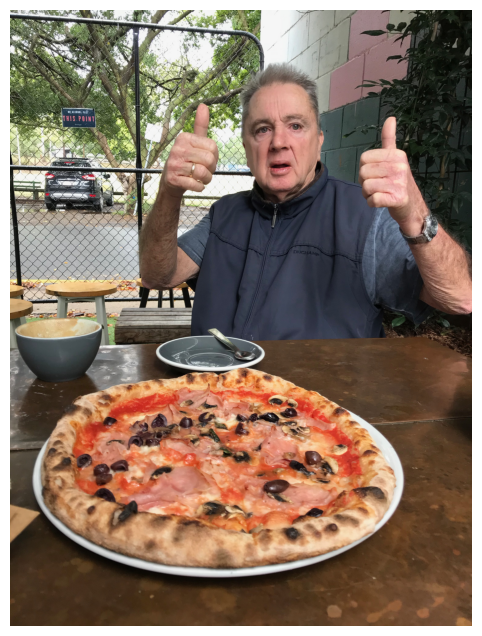

In [35]:

# View the image
plt.figure(figsize=(10, 8))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

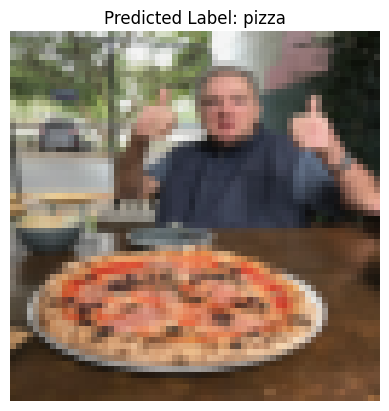

In [36]:
# Set model to evaluation mode
model_4.eval()

# Disable gradient calculations for inference
with torch.inference_mode():
    # Normalize image pixels to range [0, 1]
    img = img / 255.0

    # Resize image to 64x64
    img = transforms.Resize((64, 64))(img)

    # Add batch dimension and move to the target device
    img_batch = img.unsqueeze(0).to(device)

    # Perform prediction
    y_pred_logit = model_4(img_batch)

    # Get predicted label index
    pred_label = torch.argmax(y_pred_logit, dim=1)  # Same as applying softmax before argmax

# Display the image with its predicted label
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Predicted Label: {class_names[pred_label]}")
plt.axis(False)
